# Northwind Statistical Tests
George Bennett

In this project I will be answering four questions about the Northwind database using statistical tests: <br>
* Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
* Do different shippers have different freight costs?
* Is there a statistically significant difference in demand of produce each month?
* Do products in the Meat/Poultry category have a higher unit price than products in the Seafood category?

To begin this project I will import necessary libraries and take a look at the database's table names and the database ERD

Import Libraries

In [6]:
# import libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

Here I will create a connection to the database

In [7]:
# create a connection to the data base
conn = sqlite3.connect("Northwind_small.sqlite")
# create a cursor
c = conn.cursor()

Now I will take a look at the table names

In [8]:
# query string for selecting table names
query = """
SELECT name FROM sqlite_master WHERE type = "table"
"""
# execute query
c.execute(query).fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

Here is the ERD I was given for the dataset

<img src="Northwind_ERD_updated.png">

## Question 1: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

To answer this question I will need to first obtain the data. I will query from the OrderDetail table. The Columns I need from OrderDetail are Quantity and Discount. Finally I will put the data into a pandas DataFrame.

In [9]:
# query
query = """
SELECT Quantity, Discount FROM OrderDetail
"""
# execute query and put the data in a dataframe
df = pd.DataFrame(c.execute(query).fetchall())
# set column names
df.columns = [x[0] for x in c.description]
# preview
df.head(3)

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0


Next I will compare orders with a discount to orders without a discount. To do this I will use a T-test. In order to deturmine which type of T-test to use I will first test if the variance's of the two samples are significantly different using a Levene test. Before I perform the tests I need to make sure the group's quantity values are normally distributed. I will check this assumption with QQ-plots and histograms.

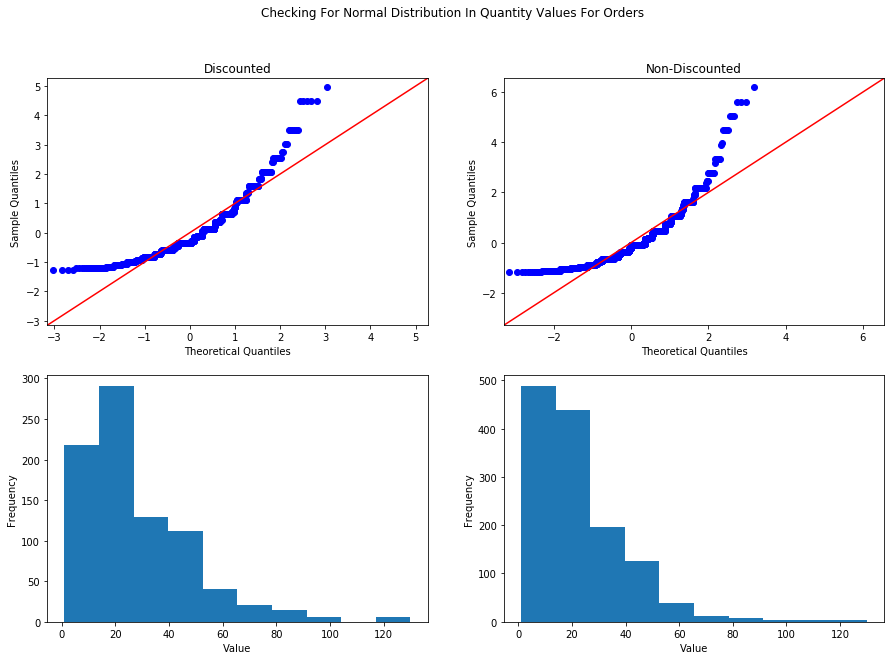

In [25]:
# Seperate Discounted Orders from Non-Discounted Orders
discounted = df[df['Discount'] > 0]['Quantity']
non_discounted = df[df['Discount'] == 0]['Quantity']
# check normality of both samples using a QQ-plots
# subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Checking For Normal Distribution In Quantity Values For Orders')
# discounted
qqplot(discounted, ax=ax1, fit=True, line='45')
ax1.set_title('Discounted')
ax3.hist(discounted)
# non_discounted
qqplot(non_discounted, ax=ax2, fit=True, line='45')
ax2.set_title('Non-Discounted')
ax4.hist(non_discounted)
# set axis labels for histograms
for ax in [ax3, ax4]:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
# display
plt.show()